**Zero-shot image classification**  
การจำแนกประเภทของข้อมูลจากภาพ โดยที่ Model ไม่เคยเห็นตัวอย่างของคลาสนั้นมาก่อน
สามารถ Applied ได้กับหลายสถารการณ์ เช่น


1.   กล้องวงจรปิดอัจฉริยะ
2.   ระบบอธิบายสิ่งตรงหน้า
3.   ระบบจัดการเนื้อหาออนไลน์

Model ที่สามารถใช้ได้ เช่น CLIP: Contrasive Language-Image pretraining

In [1]:
# !pip install transformers torch pillow

In [2]:
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
!wget https://www.vets4pets.com/siteassets/species/cat/two-cats-on-wall-in-sun.jpg -O cats.jpg
!wget https://www.worldanimalprotection.ca/cdn-cgi/image/width=1280,format=auto/siteassets/shutterstock_481623085.jpg -O cows.jpg
!wget https://supertails.com/cdn/shop/articles/1c3a0644-1ffb-4641-b2ea-5483b4ada874_520x500_a001116b-8f20-4bef-8b4c-2a57a1882223.webp?v=1734423067 -O dogs.jpg

--2025-10-07 07:09:02--  https://www.vets4pets.com/siteassets/species/cat/two-cats-on-wall-in-sun.jpg
Resolving www.vets4pets.com (www.vets4pets.com)... 172.64.145.64, 104.18.42.192, 2606:4700:4401::ac40:9140, ...
Connecting to www.vets4pets.com (www.vets4pets.com)|172.64.145.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444966 (435K) [image/jpeg]
Saving to: ‘cats.jpg’

cats.jpg            100%[===================>] 434.54K  --.-KB/s    in 0.02s   

2025-10-07 07:09:02 (20.8 MB/s) - ‘cats.jpg’ saved [444966/444966]

--2025-10-07 07:09:02--  https://www.worldanimalprotection.ca/cdn-cgi/image/width=1280,format=auto/siteassets/shutterstock_481623085.jpg
Resolving www.worldanimalprotection.ca (www.worldanimalprotection.ca)... 104.18.42.31, 172.64.145.225, 2a06:98c1:310d::6812:2a1f, ...
Connecting to www.worldanimalprotection.ca (www.worldanimalprotection.ca)|104.18.42.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115127 (112K) [

In [4]:
# Load model directly
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-large-patch14")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

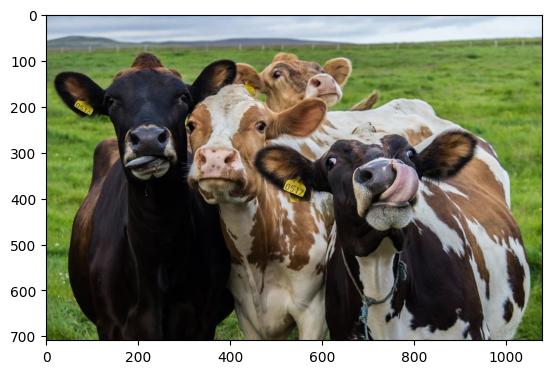

In [7]:
image = Image.open('cows.jpg')
plt.imshow(image)
plt.show()

In [8]:
labels = ['an image of cats', 'an Image of cows', 'image of a cars', 'an image of a smile people'] # หลอก

In [12]:
inputs = processor(images=image, text=labels, return_tensors='pt', padding=True)
# Padding = True เพื่อให้ความยาวแต่ละ Token ของ Labels ที่แต่ละ index
# ให้มันเท่ากันเพราะ processors require token แต่ละ index เท่ากัน
# Padding เลยทำหน้าที่เติมข้อความพิเศษเพิ่มเข้าไปเพื่อให้ Token ยาวขึ้น

In [13]:
result = model(**inputs)

In [14]:
print(result)

CLIPOutput(loss=None, logits_per_image=tensor([[17.4413, 27.7581, 15.1774, 14.6846]], grad_fn=<TBackward0>), logits_per_text=tensor([[17.4413],
        [27.7581],
        [15.1774],
        [14.6846]], grad_fn=<MulBackward0>), text_embeds=tensor([[-0.0219,  0.0323,  0.0377,  ...,  0.0082,  0.0109, -0.0015],
        [-0.0060,  0.0233,  0.0273,  ..., -0.0007, -0.0126, -0.0070],
        [ 0.0090,  0.0244,  0.0437,  ..., -0.0110,  0.0277, -0.0142],
        [ 0.0036,  0.0045,  0.0473,  ...,  0.0021,  0.0343, -0.0027]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-3.6398e-02,  1.4058e-02,  1.3950e-02, -2.3364e-02,  2.4786e-02,
          2.9166e-02,  1.4941e-02, -2.2884e-04,  1.2539e-02, -8.5565e-03,
          2.8788e-02, -1.1914e-02, -3.0715e-04,  5.9942e-03, -2.4604e-02,
          1.9720e-02, -1.5387e-02,  1.7733e-02,  5.1808e-02,  5.2534e-03,
         -4.8992e-02,  1.5525e-02, -3.0370e-02, -7.6206e-03, -3.7730e-02,
          4.9092e-03,  3.5031e-02, -1.5190e-02,  4.1786e-02, -2.1

In [16]:
print(result.keys())
# logits_per_image คือ ค่า score ของภาพเมื่อเทียบกับข้อความใน list ใช้เมื่อต้องการบอกว่า
# ภาพตรงกับข้อความไหนมากที่สุด
# logits_per_text คือ ความคล้ายของข้อความเมื่อเทียบกับภาพทั้งหมดในชุดภาพ ใช้จับคู่ภาพกับข้อความ
# text_embeds คือคุณลักษระของข้อความ
# image_embeds คือคุณณลักษรณะของภาพ
# vision_model_output คือผลลัพธ์ดิบของ model ที่ใช้ประมวลภาพ

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])


In [17]:
print(result['logits_per_image'])

tensor([[17.4413, 27.7581, 15.1774, 14.6846]], grad_fn=<TBackward0>)


In [21]:
import torch
def get_probability(result):
  probs = torch.nn.functional.softmax(result['logits_per_image'], dim=1)
  return probs

In [22]:
probs = get_probability(result)
print(probs)

tensor([[3.3072e-05, 9.9996e-01, 3.4377e-06, 2.1001e-06]],
       grad_fn=<SoftmaxBackward0>)


In [24]:
for i in range(len(labels)):
  print("Label: " + labels[i] , " Probability: ", round(probs[0][i].item(), 6))

Label: an image of cats  Probability:  3.3e-05
Label: an Image of cows  Probability:  0.999961
Label: image of a cars  Probability:  3e-06
Label: an image of a smile people  Probability:  2e-06


In [26]:
# try to edit labels
labels = [
    'an Image of cows',
    'an Image of three cows'
]

In [28]:
inputs = processor(images=image, text=labels, return_tensors='pt', padding=True)
output = model(**inputs)

In [29]:
probs = get_probability(output)
print(probs)

tensor([[0.7964, 0.2036]], grad_fn=<SoftmaxBackward0>)


In [30]:
for i in range(len(labels)):
  print("Label: " + labels[i] , " Probability: ", round(probs[0][i].item(), 6))

Label: an Image of cows  Probability:  0.79636
Label: an Image of three cows  Probability:  0.20364
